In [1]:
!gdown --folder --id 1B19RWODijlUlXEdvLKxjcmlg-BiJcbWE -O /content/shared_folder

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7 coco2017_subset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7
From (redirected): https://drive.google.com/uc?id=1tytlWWD1IqtyH3UY1cNDe5y00QJwuGh7&confirm=t&uuid=4a336060-004a-4278-b949-9352affed392
To: /content/shared_folder/coco2017_subset.zip
100% 6.71G/6.71G [01:32<00:00, 72.6MB/s]
Download completed


In [2]:
import os
os.listdir("/content/shared_folder")

['coco2017_subset.zip']

In [3]:
!unzip /content/shared_folder/coco2017_subset.zip -d /content/extracted_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508801.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508836.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508855.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508861.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508878.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508881.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508906.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508938.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508969.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508972.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508984.jpg  
  inflating: /content/extracted_file

In [4]:
import os
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [5]:
# Path to your COCO annotation file (change this to your subset JSON file)
ANNOTATION_FILE = '/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json'
# Folder where the corresponding images are stored
IMAGE_FOLDER = '/content/extracted_files/coco2017_subset/train2017'

In [6]:
# Initialize COCO API for instance annotations
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=5.06s)
creating index...
index created!


Streaming output truncated to the last 5000 lines.
Image 000000130861.jpg resized and saved successfully.
Image 000000122674.jpg resized and saved successfully.
Image 000000130416.jpg resized and saved successfully.
Image 000000054734.jpg resized and saved successfully.
Image 000000106861.jpg resized and saved successfully.
Image 000000050391.jpg resized and saved successfully.
Image 000000141791.jpg resized and saved successfully.
Image 000000004158.jpg resized and saved successfully.
Image 000000079765.jpg resized and saved successfully.
Image 000000079964.jpg resized and saved successfully.
Image 000000093658.jpg resized and saved successfully.
Image 000000005082.jpg resized and saved successfully.
Image 000000083705.jpg resized and saved successfully.
Image 000000025053.jpg resized and saved successfully.
Image 000000090806.jpg resized and saved successfully.
Image 000000004305.jpg resized and saved successfully.
Image 000000032184.jpg resized and saved successfully.
Image 00000003

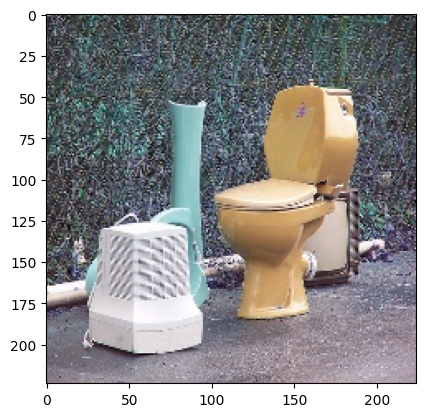

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

# Directory where the images are located
image_dir = '/content/extracted_files/coco2017_subset/test2017'
# Directory to save the resized images
output_dir = '/content/resized_images'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all files in the image directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)
        # Read the image using OpenCV
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is None:
            print(f"Error: Could not load image {filename}. Check the file path.")
            continue

        # Resize the image to 224x224 pixels
        resized_image = cv2.resize(image, (224, 224))
        # Construct the full path to save the resized image
        output_path = os.path.join(output_dir, f'resized_{filename}')
        # Save the resized image
        cv2.imwrite(output_path, resized_image)
        print(f"Image {filename} resized and saved successfully.")
# Displaying the first resized image
first_resized_image = os.listdir(output_dir)[0]
first_image_path = os.path.join(output_dir,first_resized_image)
test_image = cv2.imread(first_image_path)
plt.imshow(test_image)
plt.show()

**Normalisation**

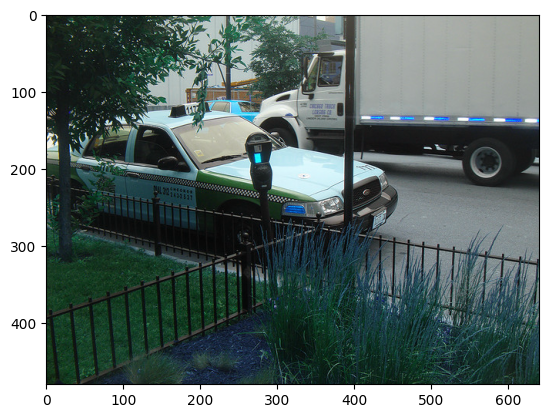

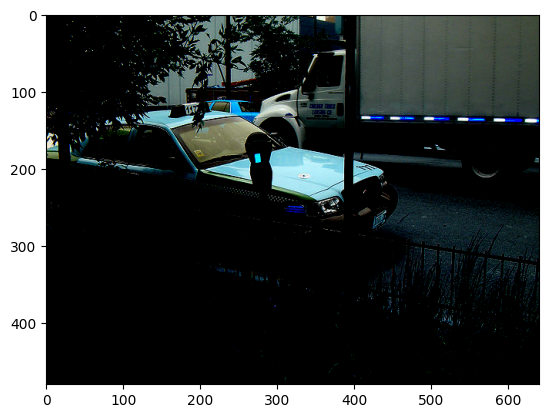

In [8]:
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')
normalized_image = image / 255.0;
normaized_image_2 = (image / 127.5) - 1;
plt.imshow(normalized_image)
plt.show()
plt.imshow(normaized_image_2)
plt.show()


 **Grayscale_Conversion**

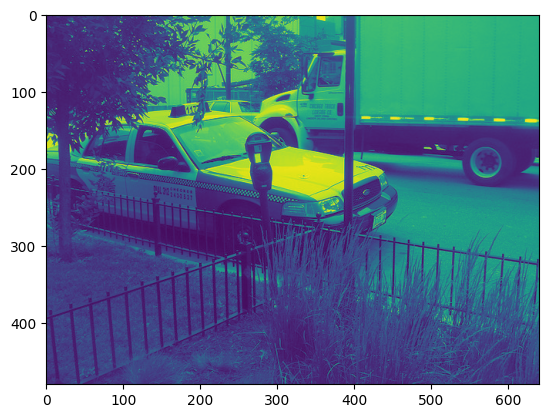

In [9]:
import matplotlib.pyplot as plt
import cv2


image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY);
cv2.imwrite('gray_image.jpg', gray_image)
plt.imshow(gray_image)
plt.show()


**Brightness** **Control**

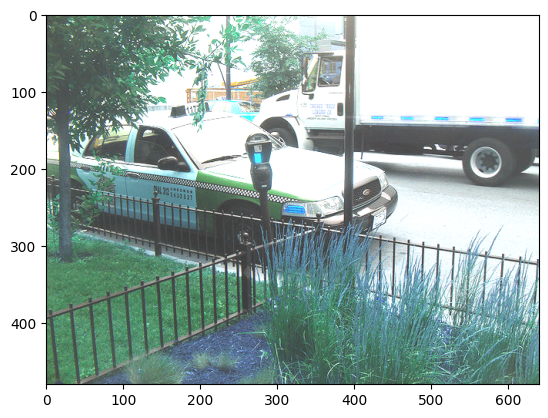

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')

# Adjust brightness and contrast
alpha = 1.5  # Contrast control (1.0 means no change)
beta = 50    # Brightness control (0 means no change)
adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Save or use the adjusted image
cv2.imwrite('adjusted_image.jpg', adjusted_image)
plt.imshow(adjusted_image) # Changed plt.show() to plt.imshow()
plt.show() # added plt.show() to display the image

**Blurred Image**

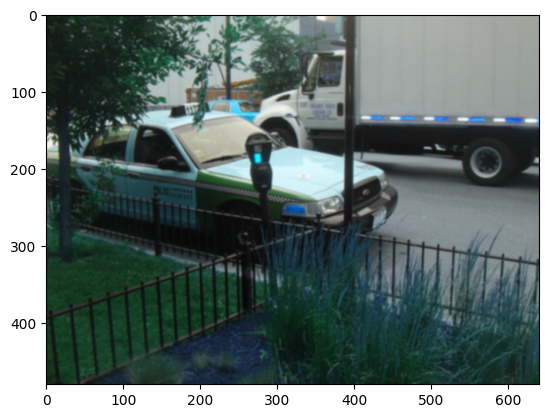

In [11]:
import cv2
import matplotlib.pyplot as plt


# Load an image
image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Save or use the blurred image
cv2.imwrite('blurred_image.jpg', blurred_image)
plt.imshow(blurred_image)


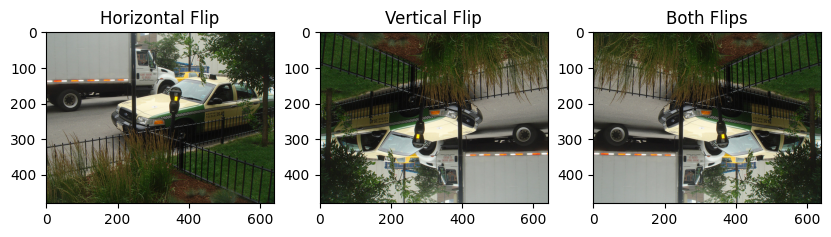

In [12]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')
flipped_image_horizontal = cv2.flip(image, 1)
flipped_image_vertical = cv2.flip(image, 0)
flipped_image_both = cv2.flip(image, -1)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(flipped_image_horizontal, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Flip')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(flipped_image_vertical, cv2.COLOR_BGR2RGB))
plt.title('Vertical Flip')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(flipped_image_both, cv2.COLOR_BGR2RGB))
plt.title('Both Flips')
plt.show()


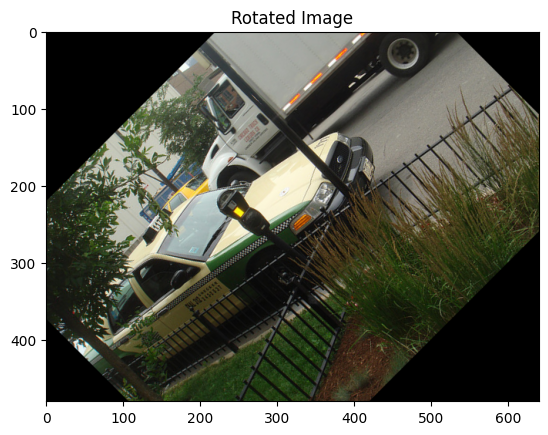

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')
height, width = image.shape[:2]

center = (width/2, height/2)
angle = 45
scale = 1.0

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.show()




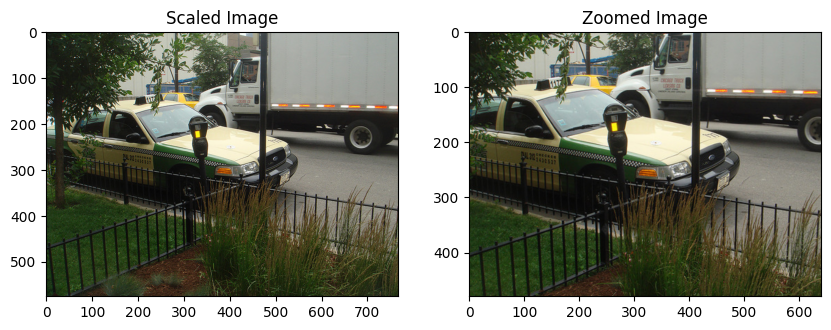

In [14]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/extracted_files/coco2017_subset/test2017/000000000001.jpg')

scaled_image = cv2.resize(image ,None, fx=1.2, fy = 1.2 , interpolation = cv2.INTER_CUBIC)
height, width = image.shape[:2]
zoom_factor = 0.8
new_height = int(height * zoom_factor)
new_width = int(width * zoom_factor)

y_start = (height - new_height) // 2
x_start = (width - new_width) // 2

zoomed_image = image[y_start: y_start + new_height , x_start:x_start + new_width]
zoomed_image = cv2.resize(zoomed_image, (width, height))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
plt.title('Zoomed Image')
plt.show()

Streaming output truncated to the last 5000 lines.
Image 000000130861.jpg augmented and saved successfully.
Image 000000122674.jpg augmented and saved successfully.
Image 000000130416.jpg augmented and saved successfully.
Image 000000054734.jpg augmented and saved successfully.
Image 000000106861.jpg augmented and saved successfully.
Image 000000050391.jpg augmented and saved successfully.
Image 000000141791.jpg augmented and saved successfully.
Image 000000004158.jpg augmented and saved successfully.
Image 000000079765.jpg augmented and saved successfully.
Image 000000079964.jpg augmented and saved successfully.
Image 000000093658.jpg augmented and saved successfully.
Image 000000005082.jpg augmented and saved successfully.
Image 000000083705.jpg augmented and saved successfully.
Image 000000025053.jpg augmented and saved successfully.
Image 000000090806.jpg augmented and saved successfully.
Image 000000004305.jpg augmented and saved successfully.
Image 000000032184.jpg augmented and 

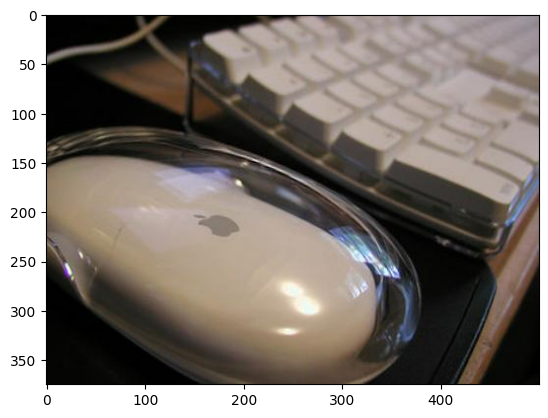

In [15]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Directory where the images are located
image_dir = '/content/extracted_files/coco2017_subset/test2017'
# Directory to save the augmented images
output_dir = '/content/augmented_images'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

data_augmentation = tf.keras.Sequential([
      tf.keras.layers.RandomFlip("horizontal"),
      tf.keras.layers.RandomRotation(0.2),
      tf.keras.layers.RandomZoom(0.2),
])

# Loop through all files in the image directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Read the image file
        image = tf.io.read_file(image_path)
        # Decode the image
        image = tf.image.decode_jpeg(image, channels=3)
        # Convert the image to float32
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)

        # Apply data augmentation
        augmented_image = data_augmentation(tf.expand_dims(image, axis=0))
        augmented_image = tf.squeeze(augmented_image, axis=0)

        # Save the augmented image
        output_path = os.path.join(output_dir, f'augmented_{filename}')
        plt.imsave(output_path, augmented_image.numpy())
        print(f"Image {filename} augmented and saved successfully.")

# Displaying the first augmented image
first_augmented_image = os.listdir(output_dir)[0]
first_image_path = os.path.join(output_dir,first_augmented_image)
test_image = plt.imread(first_image_path)
plt.imshow(test_image)
plt.show()

In [16]:
pip install pycocotools matplotlib seaborn pandas

**Number of values**

In [17]:
num_images = len(coco.getImgIds())
print(f"Number of images: {num_images}")

# Number of annotations
num_annotations = len(coco.getAnnIds())
print(f"Number of annotations: {num_annotations}")

# Number of categories
num_categories = len(coco.getCatIds())
print(f"Number of categories: {num_categories}")

# Get all categories
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]
print("Categories:", category_names)

Number of images: 29571
Number of annotations: 212806
Number of categories: 80
Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


**Plot number of annotations per image**


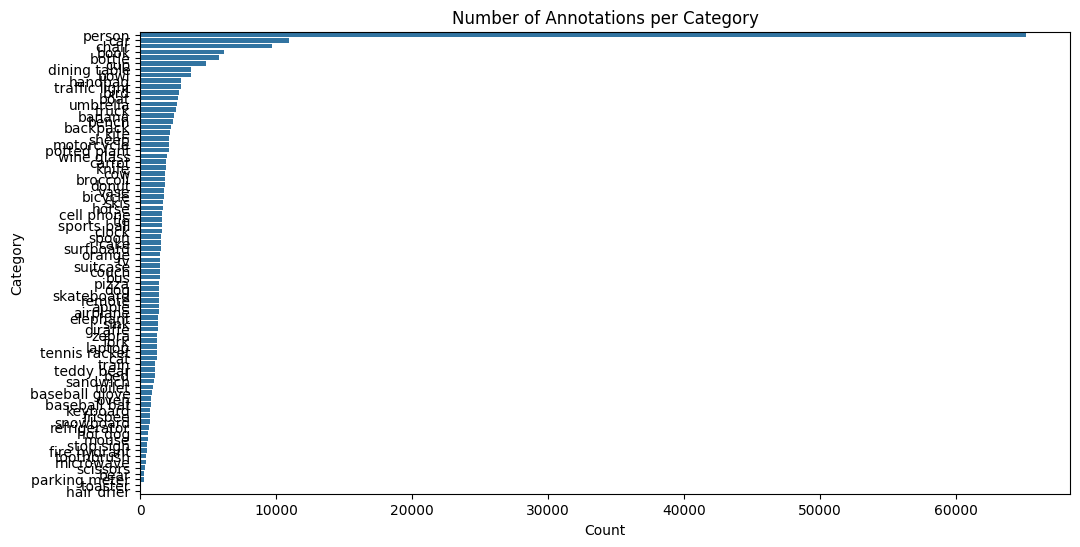

In [18]:
# Count annotations per category
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

category_annotation_counts = {cat['name']: 0 for cat in categories}
for ann in coco.loadAnns(coco.getAnnIds()):
    cat_id = ann['category_id']
    cat_name = coco.loadCats(cat_id)[0]['name']
    category_annotation_counts[cat_name] += 1

# Convert to DataFrame for visualization
df_category_counts = pd.DataFrame(list(category_annotation_counts.items()), columns=['Category', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Category', data=df_category_counts.sort_values(by='Count', ascending=False))
plt.title('Number of Annotations per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Count annotaions per image vs number of annotations**

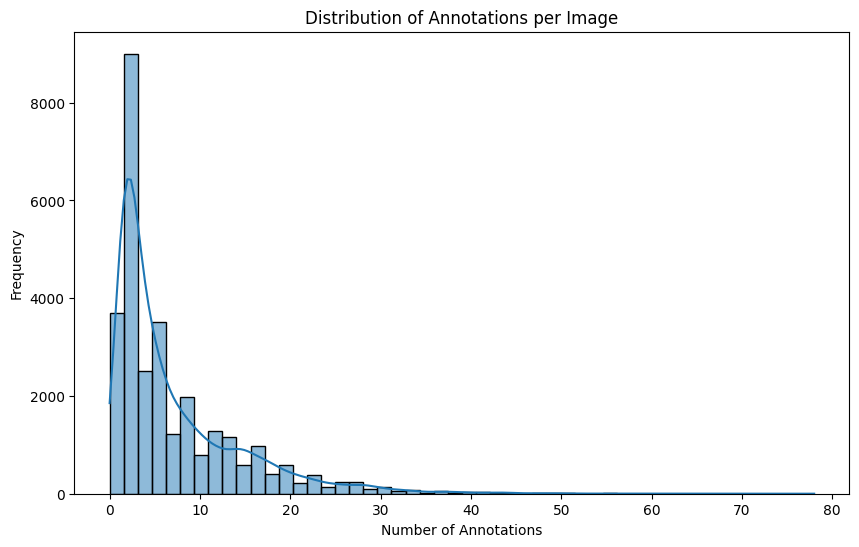

In [19]:
# Count annotations per image
image_annotation_counts = []
for img_id in coco.getImgIds():
    ann_ids = coco.getAnnIds(imgIds=img_id)
    image_annotation_counts.append(len(ann_ids))

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(image_annotation_counts, bins=50, kde=True)
plt.title('Distribution of Annotations per Image')
plt.xlabel('Number of Annotations')
plt.ylabel('Frequency')
plt.show()

**Bounding boxes and labels**

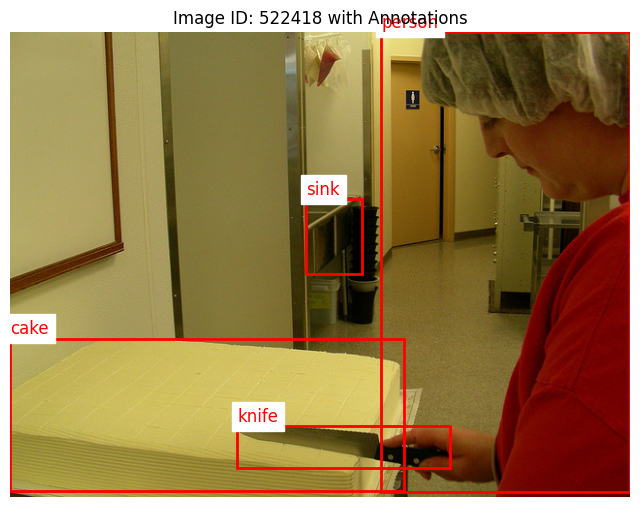

In [20]:
# Get a random image ID
image_id = coco.getImgIds()[0]
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join('/content/extracted_files/coco2017_subset/train2017', image_info['file_name'])

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Get annotations for the image
ann_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(ann_ids)

# Plot the image with annotations
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')

# Draw bounding boxes and labels
for ann in annotations:
    bbox = ann['bbox']
    x, y, w, h = bbox
    rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    cat_name = coco.loadCats(ann['category_id'])[0]['name']
    plt.text(x, y - 5, cat_name, color='red', fontsize=12, backgroundcolor='white')

plt.title(f"Image ID: {image_id} with Annotations")
plt.show()

**Distribution of Image Widths and hights**

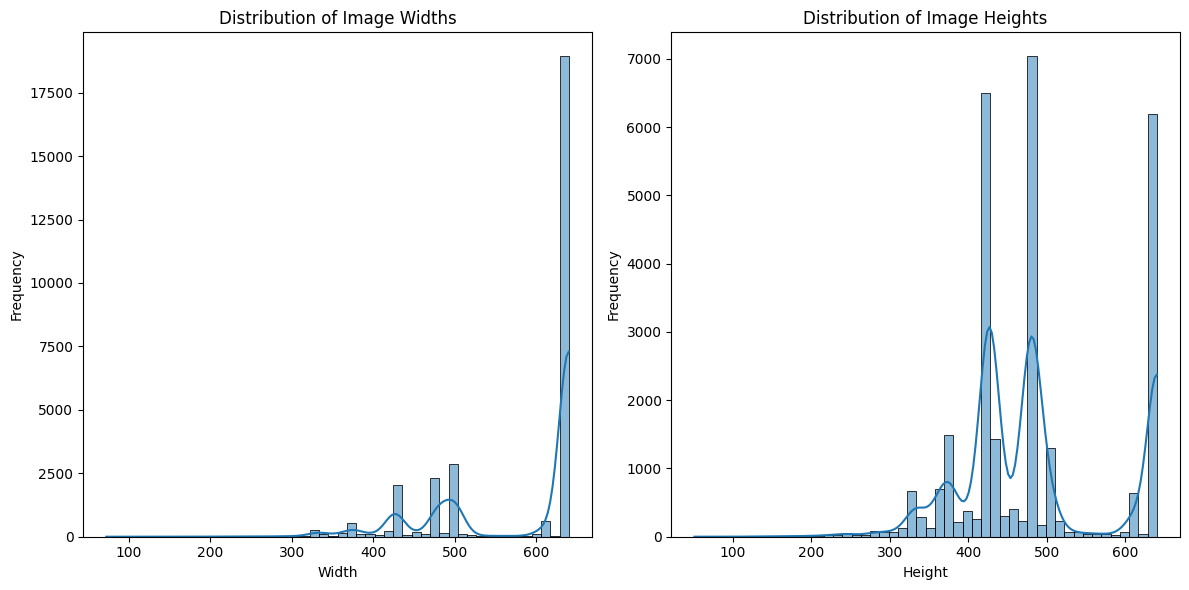

In [21]:
# Get image dimensions
image_widths = []
image_heights = []
for img_id in coco.getImgIds():
    image_info = coco.loadImgs(img_id)[0]
    image_widths.append(image_info['width'])
    image_heights.append(image_info['height'])

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(image_widths, bins=50, kde=True)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(image_heights, bins=50, kde=True)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [22]:
# Save category annotation counts to a CSV file
df_category_counts.to_csv('category_annotation_counts.csv', index=False)

# Save image annotation counts to a CSV file
df_image_counts = pd.DataFrame(image_annotation_counts, columns=['Annotation Count'])
df_image_counts.to_csv('image_annotation_counts.csv', index=False)